# 1. Basics of Pytorch
## 1) Matrices

In [5]:
import numpy as np

array=[[1,2,3],[4,5,6]]
first_array=np.array(array) #2x3 array
print("Array Type: {}".format(type(first_array))) #type
print("Array Shape: {}".format(np.shape(first_array))) #shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [6]:
import torch

tensor=torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) #type
print("Array Shape: {}".format(tensor.shape)) #shape

Array Type: <built-in method type of Tensor object at 0x7a37d1fe7420>
Array Shape: torch.Size([2, 3])


In [7]:
print("Numpy {}\n".format(np.ones((2,3))))
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [8]:
print("Numpy {}\n".format(np.random.rand(2,3)))
print(torch.rand(2,3))

Numpy [[0.58120883 0.41515904 0.71393977]
 [0.55343626 0.62768324 0.76396014]]

tensor([[0.6545, 0.2688, 0.1508],
        [0.7424, 0.3569, 0.3632]])


In [9]:
#random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

#from numpy to tensor
from_numpy_to_tensor=torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

#from tensor to numpy
tensor=from_numpy_to_tensor
from_tensor_to_numpy=tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.58498671 0.3811055 ]
 [0.83473549 0.68656114]]

tensor([[0.5850, 0.3811],
        [0.8347, 0.6866]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.58498671 0.3811055 ]
 [0.83473549 0.68656114]]



## 2) Math

In [10]:
#create tensor
tensor=torch.ones(3,3)
print("\n",tensor)

#Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

#Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

#Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

#Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

#Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

#Mean
tensor=torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

#Standart deviation(std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


## 3) Variables

In [11]:
from torch.autograd import Variable

#define variable
var=Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [12]:
#backward propagation
#y=x^2
array=[2,4]
tensor=torch.Tensor(array)
x=Variable(tensor, requires_grad=True)
y=x**2
print("y= ",y)

#o=1/2*sum(y)
o=(1/2)*sum(y)
print("o= ",o)

#backward
o.backward() #calculate gradients

print("gradients: ",x.grad)

y=  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o=  tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


# Linear Regression

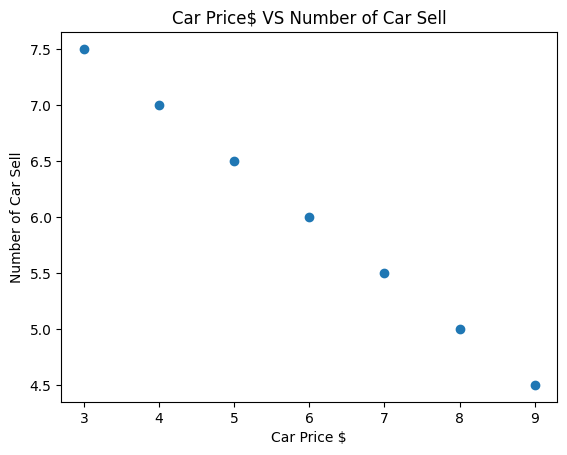

In [13]:
#car prices 정의
car_prices_array=[3,4,5,6,7,8,9]
car_price_np=np.array(car_prices_array, dtype=np.float32)
car_price_np=car_price_np.reshape(-1,1)
car_price_tensor=Variable(torch.from_numpy(car_price_np))

#number of car sell 정의
number_of_car_sell_array=[7.5,7,6.5,6.0,5.5,5.0,4.5]
number_of_car_sell_np=np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np=number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor=Variable(torch.from_numpy(number_of_car_sell_np))

#data visualization
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 7.626120567321777
epoch 50, loss 5.020003795623779
epoch 100, loss 3.392228364944458
epoch 150, loss 2.2922708988189697
epoch 200, loss 1.548982858657837
epoch 250, loss 1.0467134714126587
epoch 300, loss 0.7073084115982056
epoch 350, loss 0.47795817255973816
epoch 400, loss 0.3229772448539734
epoch 450, loss 0.2182493358850479
epoch 500, loss 0.14748051762580872
epoch 550, loss 0.09965904802083969
epoch 600, loss 0.06734328716993332
epoch 650, loss 0.0455060675740242
epoch 700, loss 0.03075045347213745
epoch 750, loss 0.02077937312424183
epoch 800, loss 0.014041508547961712
epoch 850, loss 0.009488455019891262
epoch 900, loss 0.006411740090698004
epoch 950, loss 0.004332744050770998
epoch 1000, loss 0.002927903551608324


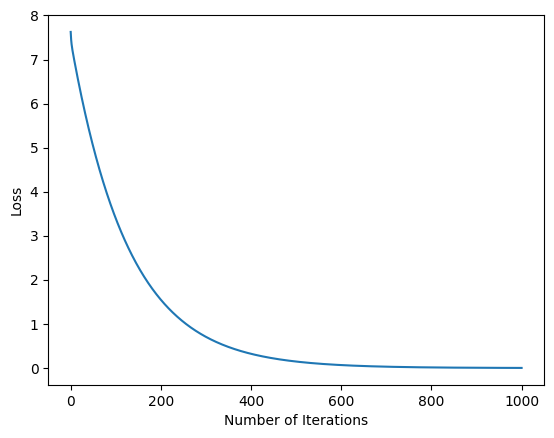

In [14]:
#Linear Regression with Pytorch

import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

#create class
class LinearRegression(nn.Module):
  def __init__(self,input_size,output_size):
    super(LinearRegression,self).__init__()
    self.linear=nn.Linear(input_dim,output_dim)
  def forward(self,x):
    return self.linear(x)

#define model
input_dim=1
output_dim=1
model=LinearRegression(input_dim,output_dim)

#MSE
mse=nn.MSELoss()

#Optimization
learning_rate=0.02
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

#train model
loss_list=[]
iteration_number=1001
for iteration in range(iteration_number):
  optimizer.zero_grad()
  results=model(car_price_tensor)
  loss=mse(results, number_of_car_sell_tensor)
  loss.backward()
  optimizer.step()
  loss_list.append(loss.data)
  if(iteration%50==0):
    print('epoch {}, loss {}'.format(iteration,loss.data))
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

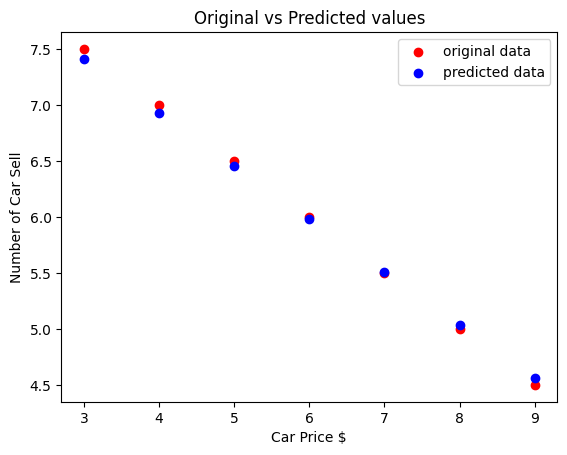

In [15]:
#predict our car price
predicted=model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array, label="original data", color="red")
plt.scatter(car_prices_array,predicted,label="predicted data",color="blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

# Logistic Regression

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


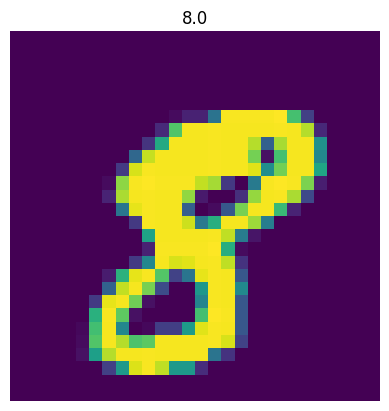

In [18]:
#Prepare Dataset
#load data
train=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Euron/train.csv", dtype=np.float32)

#split data into features and labels
targets_numpy=train.label.values
features_numpy=train.loc[:,train.columns !="label"].values/255 #normalization

features_train, features_test, targets_train, targets_test= train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)

#create feature and targets tensor for train set
featuresTrain=torch.from_numpy(features_train)
targetsTrain=torch.from_numpy(targets_train).type(torch.LongTensor)

#create feature and targets tensor for test test
featuresTest=torch.from_numpy(features_test)
targetsTest=torch.from_numpy(targets_test).type(torch.LongTensor)

#batch size, epoch, iteration
batch_size=100
n_iters=10000
num_epochs=n_iters/(len(features_train)/batch_size)
num_epochs=int(num_epochs)

#train and test sets
train=torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test=torch.utils.data.TensorDataset(featuresTest,targetsTest)

#data loader
train_loader=DataLoader(train,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test,batch_size=batch_size,shuffle=False)

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [19]:
#Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    #Linear part
    self.linear=nn.Linear(input_dim, output_dim)
  def forward(self, x):
    out=self.linear(x)
    return out

#Instantiate Model Class
input_dim=28*28
output_dim=10

#create logistic regression model
model=LogisticRegressionModel(input_dim, output_dim)

#Cross entropy loss
error=nn.CrossEntropyLoss()

#SGD Optimizer
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [20]:
#Train the Model
count=0
loss_list=[]
iteration_list=[]
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #Define variables
    train=Variable(images.view(-1,28*28))
    labels=Variable(labels)

    #Clear graidents
    optimizer.zero_grad()

    #Forward propagation
    outputs=model(train)

    #Calculate softmax and cross entropy loss
    loss=error(outputs, labels)

    #Calculate gradients
    loss.backward()

    #Update parameters
    optimizer.step()

    count+=1

    #Prediction
    if count % 50==0:
      #calculate accuracy
      correct=0
      total=0
      #predict test dataset
      for images, labels in test_loader:
        test=Variable(images.view(-1,28*28))

        #forward propagation
        outputs=model(test)

        #Get predictions from the maximum value
        predicted=torch.max(outputs.data, 1)[1]

        #Total number of labels
        total+=len(labels)

        #Total correct predictions
        correct+=(predicted==labels).sum()
      accuracy=100*correct/float(total)

      #store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
    if count%500==0:
      #print loss
      print("Iteration: {} Loss: {} Accuracy: {}".format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.846672773361206 Accuracy: 64.29762268066406
Iteration: 1000 Loss: 1.59870183467865 Accuracy: 75.23809814453125
Iteration: 1500 Loss: 1.3031034469604492 Accuracy: 78.6547622680664
Iteration: 2000 Loss: 1.212020993232727 Accuracy: 80.20237731933594
Iteration: 2500 Loss: 1.0467277765274048 Accuracy: 81.21428680419922
Iteration: 3000 Loss: 0.9273232221603394 Accuracy: 81.96428680419922
Iteration: 3500 Loss: 0.9061981439590454 Accuracy: 82.46428680419922
Iteration: 4000 Loss: 0.7489808797836304 Accuracy: 82.98809814453125
Iteration: 4500 Loss: 0.9796702861785889 Accuracy: 83.47618865966797
Iteration: 5000 Loss: 0.8066911101341248 Accuracy: 83.86904907226562
Iteration: 5500 Loss: 0.7464059591293335 Accuracy: 84.01190185546875
Iteration: 6000 Loss: 0.8679990172386169 Accuracy: 84.41666412353516
Iteration: 6500 Loss: 0.6568602919578552 Accuracy: 84.70237731933594
Iteration: 7000 Loss: 0.7194995284080505 Accuracy: 84.96428680419922
Iteration: 7500 Loss: 0.6398294568061829

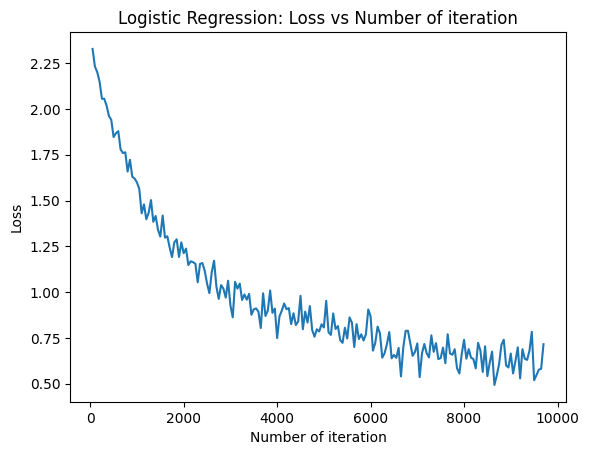

In [21]:
#visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

# Artificial Neural Network (ANN)

In [22]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [23]:
class ANNModel(nn.Module):
  def __init__(self,input_dim, hidden_dim,output_dim):
    super(ANNModel, self).__init__()

    #Linear function 1:784 -> 150
    self.fc1=nn.Linear(input_dim, hidden_dim)
    #Non-linearity 1
    self.relu1=nn.ReLU()

    #Linear function 2:150 -> 150
    self.fc2=nn.Linear(hidden_dim,hidden_dim)
    #Non-linearity 2
    self.tanh2=nn.Tanh()

    #Linear function 3:150 -> 150
    self.fc3=nn.Linear(hidden_dim,hidden_dim)
    #Non-linearity3
    self.elu3=nn.ELU()

    #Linear function 4(readout):150 -> 10
    self.fc4 = nn.Linear(hidden_dim,output_dim)
  def forward(self,x):
    #Linear function 1
    out=self.fc1(x)
    #Non-linearity 1
    out=self.relu1(out)

    #Linear function 2
    out=self.fc2(out)
    #Non-linearity 2
    out=self.tanh2(out)

    #Linear function 3
    out=self.fc3(out)
    #Non-linearity3
    out=self.elu3(out)

    #Linear function 4(readout)
    out=self.fc4(out)
    return out

#instantiate ANN
input_dim=28*28
hidden_dim=150
output_dim=10

#Create ANN
model=ANNModel(input_dim,hidden_dim,output_dim)

#Cross Entropy Loss
error=nn.CrossEntropyLoss()

#SGD Optimizer
learning_rate=0.02
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [24]:
#ANN model training
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
        train=Variable(images.view(-1,28*28))
        labels=Variable(labels)

        #Clear graidents
        optimizer.zero_grad()

        #Forward propagation
        outputs=model(train)

        #Calculate softmax and cross entropy loss
        loss=error(outputs, labels)

        #Calculate gradients
        loss.backward()

        #Update parameters
        optimizer.step()

        count+=1

        #Prediction
        if count % 50==0:
          #calculate accuracy
          correct=0
          total=0
          #predict test dataset
          for images, labels in test_loader:
            test=Variable(images.view(-1,28*28))

            #forward propagation
            outputs=model(test)

            #Get predictions from the maximum value
            predicted=torch.max(outputs.data, 1)[1]

            #Total number of labels
            total+=len(labels)

            #Total correct predictions
            correct+=(predicted==labels).sum()

          accuracy=100*correct/float(total)

          #store loss and iteration
          loss_list.append(loss.data)
          iteration_list.append(count)
          accuracy_list.append(accuracy)
        if count%500==0:
          #print loss
          print("Iteration: {} Loss: {} Accuracy: {}".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.7921617031097412 Accuracy: 77.11904907226562
Iteration: 1000 Loss: 0.4572271704673767 Accuracy: 87.42857360839844
Iteration: 1500 Loss: 0.23672418296337128 Accuracy: 89.61904907226562
Iteration: 2000 Loss: 0.3000231683254242 Accuracy: 90.39286041259766
Iteration: 2500 Loss: 0.3153296411037445 Accuracy: 91.97618865966797
Iteration: 3000 Loss: 0.12390226125717163 Accuracy: 92.63095092773438
Iteration: 3500 Loss: 0.24652564525604248 Accuracy: 93.45237731933594
Iteration: 4000 Loss: 0.0697198137640953 Accuracy: 93.86904907226562
Iteration: 4500 Loss: 0.313571572303772 Accuracy: 94.28571319580078
Iteration: 5000 Loss: 0.09294799715280533 Accuracy: 94.64286041259766
Iteration: 5500 Loss: 0.1935739517211914 Accuracy: 94.71428680419922
Iteration: 6000 Loss: 0.1855410635471344 Accuracy: 95.1547622680664
Iteration: 6500 Loss: 0.09449232369661331 Accuracy: 95.58333587646484
Iteration: 7000 Loss: 0.12162569165229797 Accuracy: 95.73809814453125
Iteration: 7500 Loss: 0.1095467

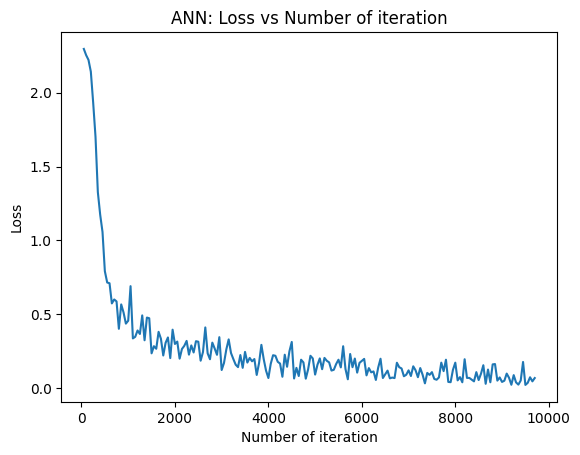

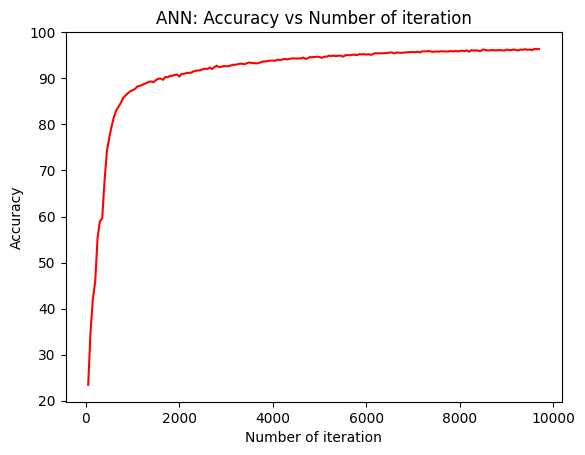

In [25]:
#visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

#visualization accuracy
plt.plot(iteration_list,accuracy_list,color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()